# Importing all the necessary libraries.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import operator 

## Reading the Dataset.

In [4]:
df = pd.read_csv("Football_stats_test.csv")
print(df)

      S.No             Player Nation   Pos          Squad            Comp  \
0        1   Brenden Aaronson    USA  MFFW   Leeds United  Premier League   
1        2   Yunis Abdelhamid    MAR    DF          Reims         Ligue 1   
2        3      Himad Abdelli    FRA    MF         Angers         Ligue 1   
3        4  Salis Abdul Samed    GHA    MF           Lens         Ligue 1   
4        5    Laurent Abergel    FRA    MF        Lorient         Ligue 1   
...    ...                ...    ...   ...            ...             ...   
2234  2235       Nadir Zortea    ITA    DF       Atalanta         Serie A   
2235  2236         Kurt Zouma    FRA    DF       West Ham  Premier League   
2236  2237      Igor Zubeldia    ESP    DF  Real Sociedad         La Liga   
2237  2238   Martín Zubimendi    ESP    MF  Real Sociedad         La Liga   
2238  2239   Szymon ?urkowski    POL    MF     Fiorentina         Serie A   

      Age  Born  MP  Starts  ...   Off   Crs  TklW  PKwon  PKcon   OG  Reco

## List of all the Leagues.

In [5]:
set1 = set(df["Comp"])
for i in set1:
    print(i)

Ligue 1
Bundesliga
La Liga
Serie A
Premier League


## La Liga 2022-2023 Football Player Stats.

#### Making a DataFrame of only La Liga players.

In [73]:
a = df.loc[df.Comp == "La Liga"]
a.head()
#a.to_csv("La_liga.csv")

,S.No,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
10,11,Marcos Acuña,ARG,DF,Sevilla,La Liga,30,1991,6,5,...,0.0,4.67,2.44,0.0,0.22,0.0,8.44,2.00,0.89,69.2
24,25,Álvaro Aguado,ESP,MF,Valladolid,La Liga,26,1996,6,5,...,0.0,0.68,0.91,0.0,0.23,0.0,10.20,0.23,0.68,25.0
29,30,Joseph Aidoo,GHA,DF,Celta Vigo,La Liga,27,1995,7,7,...,0.0,0.14,1.29,0.0,0.00,0.0,9.86,1.43,2.00,41.7
37,38,Sergio Akieme,ESP,DF,Almería,La Liga,24,1997,8,8,...,0.0,2.25,1.63,0.0,0.00,0.0,7.63,0.50,1.00,33.3
39,40,Paul Akouokou,CIV,MF,Betis,La Liga,24,1997,4,1,...,0.0,0.00,2.31,0.0,0.00,0.0,9.23,0.00,1.54,0.0


#### Deleting S.No column from DataFrame.

In [72]:
b = a.drop('S.No', axis = 1)
b.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
10,Marcos Acuña,ARG,DF,Sevilla,La Liga,30,1991,6,5,405,...,0.0,4.67,2.44,0.0,0.22,0.0,8.44,2.00,0.89,69.2
24,Álvaro Aguado,ESP,MF,Valladolid,La Liga,26,1996,6,5,395,...,0.0,0.68,0.91,0.0,0.23,0.0,10.20,0.23,0.68,25.0
29,Joseph Aidoo,GHA,DF,Celta Vigo,La Liga,27,1995,7,7,630,...,0.0,0.14,1.29,0.0,0.00,0.0,9.86,1.43,2.00,41.7
37,Sergio Akieme,ESP,DF,Almería,La Liga,24,1997,8,8,720,...,0.0,2.25,1.63,0.0,0.00,0.0,7.63,0.50,1.00,33.3
39,Paul Akouokou,CIV,MF,Betis,La Liga,24,1997,4,1,117,...,0.0,0.00,2.31,0.0,0.00,0.0,9.23,0.00,1.54,0.0


#### Average age of players in La Liga.

In [8]:
av_age = int(b["Age"].mean())
print("Average age of player is: ", av_age)

Average age of player is:  26


#### Oldest player in La Liga.

In [9]:
oldest = b.loc[b["Age"].idxmax()]

#print(a,'\n')


print("Name of the oldest player: ", oldest['Player'],"\n")
print("Age of the oldest player: ", oldest['Age'])


Name of the oldest player:  Joaquín 

Age of the oldest player:  41


#### Youngest player in La Liga.


In [10]:
a = b.loc[b["Age"].idxmin()]

#print(a,'\n')

print("Name of the youngest player: ", a['Player'])
print("Age of the youngest player: ", a['Age'])

Name of the youngest player:  Javier Llabrés
Age of the youngest player:  0


###### Since Age of the player 0 is not possible, this data is false.

##### Therefore removing this data from the DataFrame.

In [74]:
c = b.drop(1226)
c.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
10,Marcos Acuña,ARG,DF,Sevilla,La Liga,30,1991,6,5,405,...,0.0,4.67,2.44,0.0,0.22,0.0,8.44,2.00,0.89,69.2
24,Álvaro Aguado,ESP,MF,Valladolid,La Liga,26,1996,6,5,395,...,0.0,0.68,0.91,0.0,0.23,0.0,10.20,0.23,0.68,25.0
29,Joseph Aidoo,GHA,DF,Celta Vigo,La Liga,27,1995,7,7,630,...,0.0,0.14,1.29,0.0,0.00,0.0,9.86,1.43,2.00,41.7
37,Sergio Akieme,ESP,DF,Almería,La Liga,24,1997,8,8,720,...,0.0,2.25,1.63,0.0,0.00,0.0,7.63,0.50,1.00,33.3
39,Paul Akouokou,CIV,MF,Betis,La Liga,24,1997,4,1,117,...,0.0,0.00,2.31,0.0,0.00,0.0,9.23,0.00,1.54,0.0


##### Now finding the youngest player in the league...

In [12]:
youngest = c.loc[c["Age"].idxmin()]

#print(youngest,'\n')

print("Name of the youngest player: ", a['Player'])
print("Age of the youngest player: ", a['Age'])

Name of the youngest player:  Javier Llabrés
Age of the youngest player:  0


#### Top 5 Goal Scorers in La Liga.


In [13]:
Goal_scorer = c.nlargest(5, ['Goals'])
g_a = Goal_scorer['Player']
#print("Top 5 Players with most Goal_scorers: \n", g_a,"\n")

g_b =  Goal_scorer['Squad']
#print("Respective Clubs: \n",g_a,"\n")

g_c = Goal_scorer['Pos']
#print("Respective Positions: \n", g_c,"\n")

g_d = Goal_scorer["Goals"]

g_e = Goal_scorer["Nation"]

Goal_scorer_df = pd.concat([g_a,g_b,g_c,g_d,g_e],axis=1)

print(Goal_scorer_df)

                  Player            Squad Pos  Goals Nation
889       Gorka Guruzeta    Athletic Club  FW   1.67    ESP
1211  Robert Lewandowski        Barcelona  FW   1.50    POL
463         Ángel Correa  Atlético Madrid  FW   1.20    ARG
1816          Umar Sadiq    Real Sociedad  FW   1.11    NGA
981       Borja Iglesias            Betis  FW   1.00    ESP


#### Top 5 players with most Assists in La Liga.

In [14]:
assist = c.nlargest(5, ['Assists'])
aa_a = assist['Player']
#print("Top 5 Players with most assists: \n", aa_a,"\n")

aa_b =  assist['Squad']
#print("Respective Clubs: \n",aa_a,"\n")

aa_c =  assist["Nation"]

#print("Respective Positions: \n", aa_c,"\n")

aa_d = assist['Pos']

aa_e = assist["Assists"]

assist_df = pd.concat([aa_a,aa_b,aa_c,aa_d,aa_e],axis=1)

print(assist_df)

               Player          Squad Nation   Pos  Assists
1449     Jon Morcillo  Athletic Club    ESP  FWDF     2.50
702         Ansu Fati      Barcelona    ESP    FW     1.20
1379   Gonzalo Melero        Almería    ESP    MF     1.00
671      Adri Embarba        Almería    ESP    FW     0.91
57    Mohamed Ali Cho  Real Sociedad    FRA    FW     0.80


#### Top 5 Players with most Dribbles completed successfully in La Liga.

In [15]:
Dribbles = c.nlargest(5, ['DriSucc'])
d_a = Dribbles['Player']
#print("Top 5 Players with most Dribbless: \n", d_a,"\n")

d_b =  Dribbles['Squad']
#print("Respective Clubs: \n",d_a,"\n")

d_c =  Dribbles["Nation"]

#print("Respective Positions: \n", d_c,"\n")

d_d = Dribbles['Pos']

d_e = Dribbles["DriSucc"]

Dribbles_df = pd.concat([d_a,d_b,d_c,d_d,d_e],axis=1)

print(Dribbles_df)

               Player       Squad Nation   Pos  DriSucc
379            Casals      Girona    ESP  FWMF     20.0
1091           Kenedy  Valladolid    BRA    MF     10.0
1634  Francisco Perez    Valencia    ESP  DFFW     10.0
1770  Ángel Rodríguez    Mallorca    ESP    MF     10.0
109    Roberto Arroyo  Valladolid    ESP    MF      5.0


#### Top 5 players most Tackles won in La Liga.

In [16]:
tackle = c.nlargest(5, ['TklWon'])
t_a = tackle['Player']
#print("Top 5 Players with most tackles: \n", t_a,"\n")

t_b =  tackle['Squad']
#print("Respective Clubs: \n",t_a,"\n")

t_c = tackle["Nation"]
#print("Respective Positions: \n", t_c,"\n")

t_d = tackle['Pos']

t_e = tackle["TklWon"]

tackle_df = pd.concat([t_a,t_b,t_c,t_d,t_e],axis=1)

print(tackle_df)

             Player          Squad Nation   Pos  TklWon
1254     Pol Lozano       Espanyol    ESP    MF   10.00
1455    Loren Morón          Betis    ESP  FWMF   10.00
1591  Aitor Paredes  Athletic Club    ESP  DFFW    6.67
488    Braian Cufré       Mallorca    ARG    DF    5.00
788   Sékou Gassama     Valladolid    SEN    FW    5.00


#### Top 5 players with the most yellow cards in La Liga.

In [17]:
yellow_card = c.nlargest(5, ['CrdY'])
yc_a = yellow_card['Player']
#print("Top 5 Players with most yellow_cards: \n", yc_a,"\n")

yc_b =  yellow_card['Squad']
#print("Respective Clubs: \n",yc_a,"\n")

yc_c = yellow_card["Nation"]

#print("Respective Positions: \n", yc_c,"\n")

yc_d = yellow_card['Pos']

yc_e = yellow_card["CrdY"]


yellow_card_df = pd.concat([yc_a,yc_b,yc_c,yc_d,yc_e],axis=1)
print(yellow_card_df)

                 Player     Squad Nation   Pos   CrdY
1782        Iván Romero   Sevilla    ESP    MF  10.00
1415  Marko Milovanovi?   Almería    SRB    FW   5.00
1455        Loren Morón     Betis    ESP  FWMF   5.00
1634    Francisco Perez  Valencia    ESP  DFFW   5.00
820          Dani Gómez  Espanyol    ESP  MFFW   3.33


#### Top 5 players with the most red cards in La Liga.

In [18]:
red_card = c.nlargest(5, ['CrdR'])
rc_a = red_card['Player']
#print("Top 5 Players with most red_cards: \n", rc_a,"\n")

rc_b =  red_card['Squad']
#print("Respective Clubs: \n",rc_a,"\n")

rc_c = red_card["Nation"]

#print("Respective Positions: \n", rc_c,"\n")

rc_d = red_card['Pos']

rc_e = red_card["CrdR"]


red_card_df = pd.concat([rc_a,rc_b,rc_c,rc_d,rc_e],axis=1)

print(red_card_df)

              Player            Squad Nation Pos   CrdR
2124   Gonzalo Verdú            Elche    ESP  DF  10.00
940    Ander Herrera    Athletic Club    ESP  MF   1.11
935    Mario Hermoso  Atlético Madrid    ESP  DF   0.77
1411      Luis Milla           Getafe    ESP  MF   0.77
2196  Jawad El Yamiq       Valladolid    MAR  DF   0.71


#### Player with most Own goals in La Liga.

In [19]:
OG = c.loc[c["OG"].idxmax()]
#print(OG)
print (OG["Player"])


Nicolás Ezequiel Fernández


#### Player with most nutmegs in La Liga.

In [20]:
Megs = c.loc[c["DriMegs"].idxmax()]
#print(Megs)
print (Megs["Player"])


José Carlos Lazo


#### Bar Graph of the age of the players in La Liga.

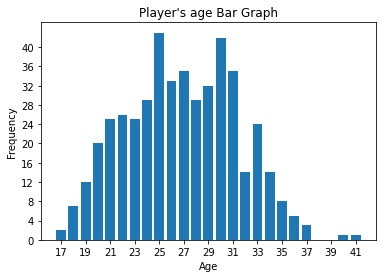

In [21]:
h = c["Age"]
#print(h)
cnt = Counter(h)
#print(cnt)

## Sorting the items in the dictionary in accesseding order.
sort_cnt = sorted(cnt.items())
sort_cnt_dict = dict(sort_cnt)

#print(sort_cnt_dict)

keys = sort_cnt_dict.keys()
#print(keys)

values = sort_cnt_dict.values()
#print(values)

plt.bar(keys, values, width = 0.8)
plt.title("Player's age Bar Graph")
plt.xlabel("Age")
plt.ylabel("Frequency")
#ax.xaxis.grid(True, which='minor')

plt.xticks([17,19,21,23,25,27,29,31,33,35,37,39,41])
plt.yticks([0,4,8,12,16,20,24,28,32,36,40])



plt.show()




In [22]:
F = c["Nation"]
cntF = Counter(F)
#print(cntF)

sorted_F = dict( sorted(cntF.items(), key=operator.itemgetter(1),reverse=True))
#print(sorted_F)

keysF = cntF.keys()
#print(keysF)

ValuesF = cntF.values()
#print(ValuesF)

N = 0
F = 0
for i  in F:
    if i == "ESP":
        #National = National + 1
        N = N+1
        print(N)
    else:
        #Foreign = Foreign + 1
        print("F")



TypeError: 'int' object is not iterable

In [ ]:
F = c["Nation"]
cntF = Counter(F)
#print(cntF)

sorted_F = dict( sorted(cntF.items(), key=operator.itemgetter(1),reverse=True))
#print(sorted_F)

keysF = cntF.keys()
#print(keysF)

ValuesF = cntF.values()
#print(ValuesF)

N = 0
F = 0
for i  in F:
    if i == "ESP":
        #National = National + 1
        N = N+1
        print(N)
    else:
        #Foreign = Foreign + 1
        print("F")


# Ligue 1, 2022-2023 Football player stats.


#### Making a DataFrame of only Ligue 1 players.

In [76]:
Ligue_1 = df.loc[df.Comp == "Ligue 1"]
Ligue_1.head()
#Ligue_1.to_csv("Ligue 1.csv")

,S.No,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,10,10,...,0.00,0.20,1.30,0.0,0.0,0.0,8.50,2.00,0.70,74.1
2,3,Himad Abdelli,FRA,MF,Angers,Ligue 1,22,1999,3,0,...,0.00,0.00,0.00,0.0,0.0,0.0,10.00,0.00,3.33,0.0
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,9,9,...,0.00,0.44,1.11,0.0,0.0,0.0,7.89,0.44,0.78,36.4
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29,1993,9,9,...,0.00,0.11,2.41,0.0,0.0,0.0,6.67,0.57,0.34,62.5
5,6,Matthis Abline,FRA,FWMF,Rennes,Ligue 1,19,2003,6,0,...,1.11,3.33,1.11,0.0,0.0,0.0,6.67,3.33,2.22,60.0


#### Deleting S.No column from DataFrame.

In [78]:
Ligue_1_b = Ligue_1.drop('S.No', axis = 1)
Ligue_1_b.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,10,10,900,...,0.00,0.20,1.30,0.0,0.0,0.0,8.50,2.00,0.70,74.1
2,Himad Abdelli,FRA,MF,Angers,Ligue 1,22,1999,3,0,27,...,0.00,0.00,0.00,0.0,0.0,0.0,10.00,0.00,3.33,0.0
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,9,9,810,...,0.00,0.44,1.11,0.0,0.0,0.0,7.89,0.44,0.78,36.4
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29,1993,9,9,783,...,0.00,0.11,2.41,0.0,0.0,0.0,6.67,0.57,0.34,62.5
5,Matthis Abline,FRA,FWMF,Rennes,Ligue 1,19,2003,6,0,84,...,1.11,3.33,1.11,0.0,0.0,0.0,6.67,3.33,2.22,60.0


#### Average age of players in Ligue 1.

In [79]:
av_age = int(Ligue_1_b["Age"].mean())
print("Average age of player is: ", av_age)

Average age of player is:  25


#### Oldest player in Ligue 1.

In [80]:
oldest = Ligue_1_b.loc[Ligue_1_b["Age"].idxmax()]
#print(a,'\n')
print("Name of the oldest player: ", oldest['Player'],"\n")
print("Age of the oldest player: ", oldest['Age'])

Name of the oldest player:  Dante 

Age of the oldest player:  38


#### Youngest player in Ligue 1.

In [81]:
youngest = Ligue_1_b.loc[Ligue_1_b["Age"].idxmin()]
#print(a,'\n')
print("Name of the youngest player: ", youngest['Player'],"\n")
print("Age of the youngest player: ", youngest['Age'])

Name of the youngest player:  Leny Yoro 

Age of the youngest player:  16


#### Top 5 Goal Scorers in Ligue 1.

In [82]:
Goal_scorer = Ligue_1_b.nlargest(5, ['Goals'])
g_a = Goal_scorer['Player']
#print("Top 5 Players with most Goal_scorers: \n", g_a,"\n")

g_b =  Goal_scorer['Squad']
#print("Respective Clubs: \n",g_a,"\n")

g_c = Goal_scorer['Pos']
#print("Respective Positions: \n", g_c,"\n")

g_d = Goal_scorer["Goals"]

g_e = Goal_scorer["Nation"]

Goal_scorer_df = pd.concat([g_a,g_b,g_c,g_d,g_e],axis=1)
print(Goal_scorer_df)

                   Player     Squad   Pos  Goals Nation
392        Yoann Cathline   Lorient    FW   2.50    FRA
529   Romain Del Castillo     Brest    MF   1.67    FRA
590          Sofiane Diop    Monaco    MF   1.43    FRA
918           Rhys Healey  Toulouse    FW   1.43    WAL
1818          Wesley Saïd      Lens  FWMF   1.33    FRA


#### Top 5 players with most Assists in Ligue 1.

In [83]:
assist = Ligue_1_b.nlargest(5, ['Assists'])
aa_a = assist['Player']
#print("Top 5 Players with most assists: \n", aa_a,"\n")

aa_b =  assist['Squad']
#print("Respective Clubs: \n",aa_a,"\n")

aa_c =  assist["Nation"]

#print("Respective Positions: \n", aa_c,"\n")

aa_d = assist['Pos']

aa_e = assist["Assists"]

assist_df = pd.concat([aa_a,aa_b,aa_c,aa_d,aa_e],axis=1)
print(assist_df)

               Player        Squad Nation   Pos  Assists
1593  Leandro Paredes    Paris S-G    ARG    MF     1.67
151    Cédric Bakambu    Marseille    COD    MF     1.43
412      Rayan Cherki         Lyon    FRA  MFFW     1.43
325      Rémy Cabella        Lille    FRA    MF     1.29
703      Khalil Fayad  Montpellier    FRA  MFFW     1.25


#### Top 5 Players with most Dribbles completed successfully in Ligue 1.

In [84]:
Dribbles = Ligue_1_b.nlargest(5, ['DriSucc'])
d_a = Dribbles['Player']
#print("Top 5 Players with most Dribbless: \n", d_a,"\n")

d_b =  Dribbles['Squad']
#print("Respective Clubs: \n",d_a,"\n")

d_c =  Dribbles["Nation"]

#print("Respective Positions: \n", d_c,"\n")

d_d = Dribbles['Pos']

d_e = Dribbles["DriSucc"]

Dribbles_df = pd.concat([d_a,d_b,d_c,d_d,d_e],axis=1)
print(Dribbles_df)

               Player    Squad Nation   Pos  DriSucc
9        Mohamed Achi   Nantes    FRA    MF     7.50
1369  Nathanael Mbuku    Reims    FRA  MFDF     7.50
607       Jeremy Doku   Rennes    BEL  FWMF     7.06
2       Himad Abdelli   Angers    FRA    MF     6.67
392    Yoann Cathline  Lorient    FRA    FW     5.00


#### Top 5 players most Tackles won in Ligue 1.

In [85]:
tackle = Ligue_1_b.nlargest(5, ['TklWon'])
t_a = tackle['Player']
#print("Top 5 Players with most tackles: \n", t_a,"\n")

t_b =  tackle['Squad']
#print("Respective Clubs: \n",t_a,"\n")

t_c = tackle["Nation"]
#print("Respective Positions: \n", t_c,"\n")

t_d = tackle['Pos']

t_e = tackle["TklWon"]

tackle_df = pd.concat([t_a,t_b,t_c,t_d,t_e],axis=1)
print(tackle_df)

               Player       Squad Nation   Pos  TklWon
620    Ckene Doucouré     Lorient    COM    FW   10.00
1069   Nordine Kandil  Strasbourg    FRA  MFFW    7.50
2200    Darlin Yongwa     Lorient    CMR  FWDF    7.50
565   Ibrahim Diakité       Reims    GUI  DFMF    6.67
70     Ibrahim Amadou      Angers    FRA    MF    5.00


#### Top 5 players with the most yellow cards in Ligue 1.

In [86]:
yellow_card = Ligue_1_b.nlargest(5, ['CrdY'])
yc_a = yellow_card['Player']
#print("Top 5 Players with most yellow_cards: \n", yc_a,"\n")

yc_b =  yellow_card['Squad']
#print("Respective Clubs: \n",yc_a,"\n")

yc_c = yellow_card["Nation"]

#print("Respective Positions: \n", yc_c,"\n")

yc_d = yellow_card['Pos']

yc_e = yellow_card["CrdY"]


yellow_card_df = pd.concat([yc_a,yc_b,yc_c,yc_d,yc_e],axis=1)
print(yellow_card_df)

                   Player          Squad Nation   Pos  CrdY
2221        Mehdi Zeffane  Clermont Foot    ALG    DF  5.00
795         Denis Genreau       Toulouse    AUS    MF  2.00
2066     Souleymane Touré      Marseille    FRA    DF  2.00
529   Romain Del Castillo          Brest    FRA    MF  1.67
565       Ibrahim Diakité          Reims    GUI  DFMF  1.67


#### Top 5 players with the most red cards in Ligue 1.

In [87]:
red_card = Ligue_1_b.nlargest(5, ['CrdR'])
rc_a = red_card['Player']
#print("Top 5 Players with most red_cards: \n", rc_a,"\n")

rc_b =  red_card['Squad']
#print("Respective Clubs: \n",rc_a,"\n")

rc_c = red_card["Nation"]

#print("Respective Positions: \n", rc_c,"\n")

rc_d = red_card['Pos']

rc_e = red_card["CrdR"]


red_card_df = pd.concat([rc_a,rc_b,rc_c,rc_d,rc_e],axis=1)
print(red_card_df)

              Player        Squad Nation   Pos  CrdR
703     Khalil Fayad  Montpellier    FRA  MFFW  1.25
907   Romain Hamouma      Ajaccio    FRA    FW  0.47
797   Valère Germain  Montpellier    FRA  MFFW  0.45
1532  Gerzino Nyamsi   Strasbourg    FRA    DF  0.43
692            Fábio       Nantes    BRA    DF  0.40


#### Player with most nutmegs in Ligue 1.

In [88]:
Megs = Ligue_1_b.loc[Ligue_1_b["DriMegs"].idxmax()]
#print(Megs)
print (Megs["Player"])


Souleymane Touré


#### Bar Graph of the age of the players in Ligue 1.

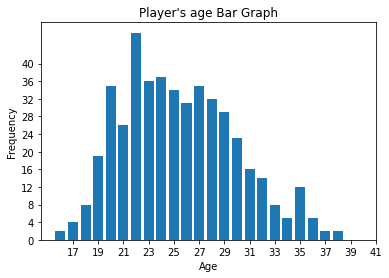

In [89]:
h = Ligue_1_b["Age"]
#print(h)
cnt = Counter(h)
#print(cnt)

## Sorting the items in the dictionary in accesseding order.
sort_cnt = sorted(cnt.items())
sort_cnt_dict = dict(sort_cnt)

#print(sort_cnt_dict)

keys = sort_cnt_dict.keys()
#print(keys)

values = sort_cnt_dict.values()
#print(values)

plt.bar(keys, values, width = 0.8)
plt.title("Player's age Bar Graph")
plt.xlabel("Age")
plt.ylabel("Frequency")
#ax.xaxis.grid(True, which='minor')

plt.xticks([17,19,21,23,25,27,29,31,33,35,37,39,41])
plt.yticks([0,4,8,12,16,20,24,28,32,36,40])



plt.show()




## Bundesliga 2022-2023 Football Player Stats.

#### Making a DataFrame of only Bundesliga players.

In [92]:
Bl = df.loc[df.Comp == "Bundesliga"]
Bl.head()
#Bl.to_csv("La_liga.csv")

,S.No,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
13,14,Sargis Adamyan,ARM,FW,Köln,Bundesliga,29,1993,8,1,...,1.20,2.00,0.40,0.0,0.0,0.0,6.80,1.60,3.20,33.3
16,17,Karim Adeyemi,GER,FWMF,Dortmund,Bundesliga,20,2002,5,3,...,0.00,2.17,0.00,0.0,0.0,0.0,6.09,1.30,1.30,50.0
17,18,Amine Adli,FRA,FWDF,Leverkusen,Bundesliga,22,2000,3,0,...,1.11,2.22,1.11,0.0,0.0,0.0,12.20,1.11,2.22,33.3
23,24,Felix Agu,GER,DF,Werder Bremen,Bundesliga,23,1999,1,0,...,0.00,0.00,0.00,0.0,0.0,0.0,30.00,0.00,10.00,0.0
27,28,Naouirou Ahamada,FRA,MF,Stuttgart,Bundesliga,20,2002,8,8,...,0.14,0.41,0.68,0.0,0.0,0.0,7.26,0.96,1.23,43.8


#### Deleting S.No column from DataFrame

In [93]:
Bl = Bl.drop('S.No', axis = 1)
Bl.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
13,Sargis Adamyan,ARM,FW,Köln,Bundesliga,29,1993,8,1,226,...,1.20,2.00,0.40,0.0,0.0,0.0,6.80,1.60,3.20,33.3
16,Karim Adeyemi,GER,FWMF,Dortmund,Bundesliga,20,2002,5,3,207,...,0.00,2.17,0.00,0.0,0.0,0.0,6.09,1.30,1.30,50.0
17,Amine Adli,FRA,FWDF,Leverkusen,Bundesliga,22,2000,3,0,85,...,1.11,2.22,1.11,0.0,0.0,0.0,12.20,1.11,2.22,33.3
23,Felix Agu,GER,DF,Werder Bremen,Bundesliga,23,1999,1,0,15,...,0.00,0.00,0.00,0.0,0.0,0.0,30.00,0.00,10.00,0.0
27,Naouirou Ahamada,FRA,MF,Stuttgart,Bundesliga,20,2002,8,8,660,...,0.14,0.41,0.68,0.0,0.0,0.0,7.26,0.96,1.23,43.8


#### Average age of players in Bundesliga.

In [94]:
av_age = int(Bl["Age"].mean())
print("Average age of player is: ", av_age)

Average age of player is:  25


#### Oldest player in Bundesliga.

In [95]:
oldest = Bl.loc[Bl["Age"].idxmax()]
#print(a,'\n')
print("Name of the oldest player: ", oldest['Player'],"\n")
print("Age of the oldest player: ", oldest['Age'])

Name of the oldest player:  Makoto Hasebe 

Age of the oldest player:  38


#### Youngest player in Bundesliga.

In [96]:
youngest = Bl.loc[Bl["Age"].idxmin()]
#print(a,'\n')
print("Name of the youngest player: ", youngest['Player'],"\n")
print("Age of the youngest player: ", youngest['Age'])

Name of the youngest player:  Youssoufa Moukoko 

Age of the youngest player:  17


#### Top 5 Goal Scorers in Bundesliga.

In [97]:
Goal_scorer = Bl.nlargest(5, ['Goals'])
g_a = Goal_scorer['Player']
#print("Top 5 Players with most Goal_scorers: \n", g_a,"\n")

g_b =  Goal_scorer['Squad']
#print("Respective Clubs: \n",g_a,"\n")

g_c = Goal_scorer['Pos']
#print("Respective Positions: \n", g_c,"\n")

g_d = Goal_scorer["Goals"]

g_e = Goal_scorer["Nation"]

Goal_scorer_df = pd.concat([g_a,g_b,g_c,g_d,g_e],axis=1)
print(Goal_scorer_df)

             Player          Squad   Pos  Goals Nation
1604       Paulinho     Leverkusen  FWMF   3.33    BRA
1750  Marco Richter     Hertha BSC  FWDF   1.82    GER
1401    Sven Michel   Union Berlin  FWMF   1.54    GER
319    Oliver Burke  Werder Bremen    FW   1.43    SCO
495   Moanes Dabbur     Hoffenheim    FW   1.00    ISR


#### Top 5 players with most Assists in Bundesliga.

In [98]:
assist = Bl.nlargest(5, ['Assists'])
aa_a = assist['Player']
#print("Top 5 Players with most assists: \n", aa_a,"\n")

aa_b =  assist['Squad']
#print("Respective Clubs: \n",aa_a,"\n")

aa_c =  assist["Nation"]

#print("Respective Positions: \n", aa_c,"\n")

aa_d = assist['Pos']

aa_e = assist["Assists"]

assist_df = pd.concat([aa_a,aa_b,aa_c,aa_d,aa_e],axis=1)
print(assist_df)

                 Player          Squad Nation   Pos  Assists
2133    Gabriel Vidovic  Bayern Munich    CRO  MFFW     5.00
974   Denis Huseinbasic           Köln    GER    MF     3.33
1887        Paul Seguin   Union Berlin    GER    MF     2.00
1982     Angelo Stiller     Hoffenheim    GER    MF     2.00
1057     Sasa Kalajdzic      Stuttgart    AUT    FW     1.15


#### Top 5 Players with most Dribbles completed successfully in Bundesliga.

In [99]:
Dribbles = Bl.nlargest(5, ['DriSucc'])
d_a = Dribbles['Player']
#print("Top 5 Players with most Dribbless: \n", d_a,"\n")

d_b =  Dribbles['Squad']
#print("Respective Clubs: \n",d_a,"\n")

d_c =  Dribbles["Nation"]

#print("Respective Positions: \n", d_c,"\n")

d_d = Dribbles['Pos']

d_e = Dribbles["DriSucc"]

Dribbles_df = pd.concat([d_a,d_b,d_c,d_d,d_e],axis=1)
print(Dribbles_df)

                      Player         Squad Nation   Pos  DriSucc
178             Aymen Barkok      Mainz 05    MAR    MF    10.00
275   Yvandro Borges Sanches    M'Gladbach    LUX    MF    10.00
2157           Robert Wagner      Freiburg    GER    MF    10.00
1212          Jamie Leweling  Union Berlin    GER    FW     8.00
1604                Paulinho    Leverkusen    BRA  FWMF     6.67


#### Top 5 players most Tackles won in Bundesliga.

In [100]:
tackle = Bl.nlargest(5, ['TklWon'])
t_a = tackle['Player']
#print("Top 5 Players with most tackles: \n", t_a,"\n")

t_b =  tackle['Squad']
#print("Respective Clubs: \n",t_a,"\n")

t_c = tackle["Nation"]
#print("Respective Positions: \n", t_c,"\n")

t_d = tackle['Pos']

t_e = tackle["TklWon"]

tackle_df = pd.concat([t_a,t_b,t_c,t_d,t_e],axis=1)
print(tackle_df)

                      Player       Squad Nation   Pos  TklWon
275   Yvandro Borges Sanches  M'Gladbach    LUX    MF    10.0
1015          Tony Jantschke  M'Gladbach    GER    MF    10.0
1647            Lukas Petkov    Augsburg    GER    MF    10.0
1074           Kenan Karaman  Schalke 04    TUR  FWMF     6.0
747       Raphael Framberger    Augsburg    GER    DF     5.0


#### Top 5 players with the most yellow cards in Bundesliga.

In [101]:
yellow_card = Bl.nlargest(5, ['CrdY'])
yc_a = yellow_card['Player']
#print("Top 5 Players with most yellow_cards: \n", yc_a,"\n")

yc_b =  yellow_card['Squad']
#print("Respective Clubs: \n",yc_a,"\n")

yc_c = yellow_card["Nation"]

#print("Respective Positions: \n", yc_c,"\n")

yc_d = yellow_card['Pos']

yc_e = yellow_card["CrdY"]


yellow_card_df = pd.concat([yc_a,yc_b,yc_c,yc_d,yc_e],axis=1)
print(yellow_card_df)

                 Player       Squad Nation   Pos   CrdY
1683       Stefan Posch  Hoffenheim    AUT    DF  10.00
1951  Alexander Sørloth  RB Leipzig    NOR    FW  10.00
943    Patrick Herrmann  M'Gladbach    GER  FWMF   6.67
1438       Clinton Mola   Stuttgart    ENG    DF   5.00
974   Denis Huseinbasic        Köln    GER    MF   3.33


#### Top 5 players with the most red cards in Bundesliga.

In [102]:
red_card = Bl.nlargest(5, ['CrdR'])
rc_a = red_card['Player']
#print("Top 5 Players with most red_cards: \n", rc_a,"\n")

rc_b =  red_card['Squad']
#print("Respective Clubs: \n",rc_a,"\n")

rc_c = red_card["Nation"]

#print("Respective Positions: \n", rc_c,"\n")

rc_d = red_card['Pos']

rc_e = red_card["CrdR"]


red_card_df = pd.concat([rc_a,rc_b,rc_c,rc_d,rc_e],axis=1)
print(red_card_df)

              Player          Squad Nation   Pos  CrdR
1683    Stefan Posch     Hoffenheim    AUT    DF  5.00
1650   Luca Pfeiffer      Stuttgart    GER    FW  0.91
448   Kingsley Coman  Bayern Munich    FRA  MFFW  0.30
152   Mitchel Bakker     Leverkusen    NED    DF  0.28
234   Mergim Berisha       Augsburg    GER    FW  0.28


#### Player with most nutmegs in Bundesliga.

In [103]:
Megs = Bl.loc[Bl["DriMegs"].idxmax()]
#print(Megs)
print (Megs["Player"])

Robert Wagner


#### Bar Graph of the age of the players in Bundesliga.

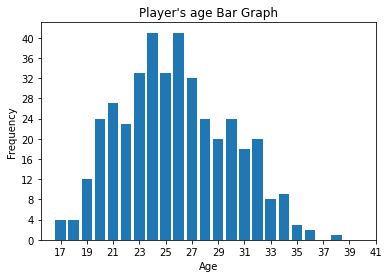

In [104]:
h = Bl["Age"]
#print(h)
cnt = Counter(h)
#print(cnt)

## Sorting the items in the dictionary in accesseding order.
sort_cnt = sorted(cnt.items())
sort_cnt_dict = dict(sort_cnt)

#print(sort_cnt_dict)

keys = sort_cnt_dict.keys()
#print(keys)

values = sort_cnt_dict.values()
#print(values)

plt.bar(keys, values, width = 0.8)
plt.title("Player's age Bar Graph")
plt.xlabel("Age")
plt.ylabel("Frequency")
#ax.xaxis.grid(True, which='minor')

plt.xticks([17,19,21,23,25,27,29,31,33,35,37,39,41])
plt.yticks([0,4,8,12,16,20,24,28,32,36,40])



plt.show()




## Premier League 2022-2023 Football Player Stats.

#### Making a DataFrame of only Premier League players.

In [105]:
Pl = df.loc[df.Comp == "Premier League"]
Pl.head()
#Pl.to_csv("Ligue 1.csv")

,S.No,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,21,2000,7,7,...,0.47,1.25,1.09,0.0,0.00,0.00,5.78,0.47,2.66,15.0
11,12,Che Adams,SCO,FW,Southampton,Premier League,26,1996,8,7,...,0.28,1.13,0.42,0.0,0.00,0.00,4.37,3.38,7.46,31.2
12,13,Tyler Adams,USA,MF,Leeds United,Premier League,23,1999,7,7,...,0.00,0.14,1.71,0.0,0.00,0.00,13.70,0.57,0.86,40.0
14,15,Tosin Adarabioyo,ENG,DF,Fulham,Premier League,25,1997,8,8,...,0.00,0.00,0.75,0.0,0.00,0.00,8.75,3.13,0.75,80.6
31,32,Rayan Aït Nouri,FRA,DF,Wolves,Premier League,21,2001,8,6,...,0.00,1.29,1.29,0.0,0.16,0.16,6.94,1.45,1.77,45.0


#### Deleting S.No column from DataFrame.

In [106]:
Pl = Pl.drop('S.No', axis = 1)
Pl.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,21,2000,7,7,579,...,0.47,1.25,1.09,0.0,0.00,0.00,5.78,0.47,2.66,15.0
11,Che Adams,SCO,FW,Southampton,Premier League,26,1996,8,7,642,...,0.28,1.13,0.42,0.0,0.00,0.00,4.37,3.38,7.46,31.2
12,Tyler Adams,USA,MF,Leeds United,Premier League,23,1999,7,7,630,...,0.00,0.14,1.71,0.0,0.00,0.00,13.70,0.57,0.86,40.0
14,Tosin Adarabioyo,ENG,DF,Fulham,Premier League,25,1997,8,8,720,...,0.00,0.00,0.75,0.0,0.00,0.00,8.75,3.13,0.75,80.6
31,Rayan Aït Nouri,FRA,DF,Wolves,Premier League,21,2001,8,6,560,...,0.00,1.29,1.29,0.0,0.16,0.16,6.94,1.45,1.77,45.0


#### Average age of players in Premier League.

In [107]:
av_age = int(Pl["Age"].mean())
print("Average age of player is: ", av_age)

Average age of player is:  26


#### Oldest player in Premier League.

In [108]:
oldest = Pl.loc[Pl["Age"].idxmax()]
#print(a,'\n')
print("Name of the oldest player: ", oldest['Player'],"\n")
print("Age of the oldest player: ", oldest['Age'])

Name of the oldest player:  Thiago Silva 

Age of the oldest player:  38


#### Youngest player in Premier League.

In [109]:
youngest = Pl.loc[Pl["Age"].idxmin()]
#print(a,'\n')
print("Name of the youngest player: ", youngest['Player'],"\n")
print("Age of the youngest player: ", youngest['Age'])

Name of the youngest player:  Ethan Nwaneri 

Age of the youngest player:  15


#### Top 5 Goal Scorers in Premier League.

In [110]:
Goal_scorer = Pl.nlargest(5, ['Goals'])
g_a = Goal_scorer['Player']
#print("Top 5 Players with most Goal_scorers: \n", g_a,"\n")

g_b =  Goal_scorer['Squad']
#print("Respective Clubs: \n",g_a,"\n")

g_c = Goal_scorer['Pos']
#print("Respective Positions: \n", g_c,"\n")

g_d = Goal_scorer["Goals"]

g_e = Goal_scorer["Nation"]

Goal_scorer_df = pd.concat([g_a,g_b,g_c,g_d,g_e],axis=1)
print(Goal_scorer_df)

                         Player            Squad   Pos  Goals Nation
1331            Anthony Martial   Manchester Utd    FW   2.22    FRA
897              Erling Haaland  Manchester City    FW   1.81    NOR
91                       Antony   Manchester Utd    FW   1.25    BRA
123   Pierre-Emerick Aubameyang          Chelsea    FW   1.25    GAB
727             Roberto Firmino        Liverpool  FWMF   1.09    BRA


#### Top 5 players with most Assists in Premier League.

In [111]:
assist = Pl.nlargest(5, ['Assists'])
aa_a = assist['Player']
#print("Top 5 Players with most assists: \n", aa_a,"\n")

aa_b =  assist['Squad']
#print("Respective Clubs: \n",aa_a,"\n")

aa_c =  assist["Nation"]

#print("Respective Positions: \n", aa_c,"\n")

aa_d = assist['Pos']

aa_e = assist["Assists"]

assist_df = pd.concat([aa_a,aa_b,aa_c,aa_d,aa_e],axis=1)
print(assist_df)

               Player            Squad Nation   Pos  Assists
135       Luke Ayling     Leeds United    ENG    DF     2.00
520   Kevin De Bruyne  Manchester City    BEL    MF     1.18
1331  Anthony Martial   Manchester Utd    FRA    FW     1.11
2080  Kostas Tsimikas        Liverpool    GRE    DF     0.95
2182          Willian           Fulham    BRA  FWMF     0.91


#### Top 5 Players with most Dribbles completed successfully in Premier League.

In [112]:
Dribbles = Pl.nlargest(5, ['DriSucc'])
d_a = Dribbles['Player']
#print("Top 5 Players with most Dribbless: \n", d_a,"\n")

d_b =  Dribbles['Squad']
#print("Respective Clubs: \n",d_a,"\n")

d_c =  Dribbles["Nation"]

#print("Respective Positions: \n", d_c,"\n")

d_d = Dribbles['Pos']

d_e = Dribbles["DriSucc"]

Dribbles_df = pd.concat([d_a,d_b,d_c,d_d,d_e],axis=1)
print(Dribbles_df)

              Player           Squad Nation   Pos  DriSucc
644  Malcolm Ebiowei  Crystal Palace    ENG    FW     10.0
135      Luke Ayling    Leeds United    ENG    DF      6.0
351    Chem Campbell          Wolves    WAL  FWMF      6.0
79   Elliot Anderson   Newcastle Utd    SCO  FWMF      5.0
651    Samuel Edozie     Southampton    ENG  MFFW      5.0


#### Top 5 players most Tackles won in Premier League.

In [113]:
tackle = Pl.nlargest(5, ['TklWon'])
t_a = tackle['Player']
#print("Top 5 Players with most tackles: \n", t_a,"\n")

t_b =  tackle['Squad']
#print("Respective Clubs: \n",t_a,"\n")

t_c = tackle["Nation"]
#print("Respective Positions: \n", t_c,"\n")

t_d = tackle['Pos']

t_e = tackle["TklWon"]

tackle_df = pd.concat([t_a,t_b,t_c,t_d,t_e],axis=1)
print(tackle_df)

                  Player            Squad Nation   Pos  TklWon
240           Owen Bevan      Bournemouth    WAL    DF    10.0
242     Giulian Biancone  Nott'ham Forest    FRA    DF    10.0
404   Nathaniel Chalobah           Fulham    ENG    MF    10.0
1925        Oliver Skipp        Tottenham    ENG    MF    10.0
2088         Deniz Undav         Brighton    GER  MFFW    10.0


#### Top 5 players with the most yellow cards in Premier League.

In [114]:
yellow_card = Pl.nlargest(5, ['CrdY'])
yc_a = yellow_card['Player']
#print("Top 5 Players with most yellow_cards: \n", yc_a,"\n")

yc_b =  yellow_card['Squad']
#print("Respective Clubs: \n",yc_a,"\n")

yc_c = yellow_card["Nation"]

#print("Respective Positions: \n", yc_c,"\n")

yc_d = yellow_card['Pos']

yc_e = yellow_card["CrdY"]


yellow_card_df = pd.concat([yc_a,yc_b,yc_c,yc_d,yc_e],axis=1)
print(yellow_card_df)

                   Player            Squad Nation   Pos  CrdY
126   Ludwig Augustinsson      Aston Villa    SWE    DF  2.00
267            Willy Boly  Nott'ham Forest    CIV    DF  1.43
1280        Harry Maguire   Manchester Utd    ENG    DF  1.43
1417           Yerry Mina          Everton    COL    DF  1.25
1918      Luis Sinisterra     Leeds United    COL  FWMF  1.20


#### Top 5 players with the most red cards in Premier League.

In [115]:
red_card = Pl.nlargest(5, ['CrdR'])
rc_a = red_card['Player']
#print("Top 5 Players with most red_cards: \n", rc_a,"\n")

rc_b =  red_card['Squad']
#print("Respective Clubs: \n",rc_a,"\n")

rc_c = red_card["Nation"]

#print("Respective Positions: \n", rc_c,"\n")

rc_d = red_card['Pos']

rc_e = red_card["CrdR"]


red_card_df = pd.concat([rc_a,rc_b,rc_c,rc_d,rc_e],axis=1)
print(red_card_df)

                  Player         Squad Nation   Pos   CrdR
404   Nathaniel Chalobah        Fulham    ENG    MF  10.00
1528        Darwin Núñez     Liverpool    URU    FW   0.50
1918     Luis Sinisterra  Leeds United    COL  FWMF   0.40
769      Conor Gallagher       Chelsea    ENG  MFFW   0.36
1128   Kalidou Koulibaly       Chelsea    SEN    DF   0.18


#### Player with most nutmegs in Premier League.

In [116]:
Megs = Pl.loc[Pl["DriMegs"].idxmax()]
#print(Megs)
print (Megs["Player"])

Samuel Edozie


#### Bar Graph of the age of the players in Premier League.

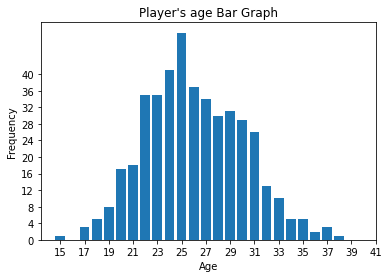

In [117]:
h = Pl["Age"]
#print(h)
cnt = Counter(h)
#print(cnt)

## Sorting the items in the dictionary in accesseding order.
sort_cnt = sorted(cnt.items())
sort_cnt_dict = dict(sort_cnt)

#print(sort_cnt_dict)

keys = sort_cnt_dict.keys()
#print(keys)

values = sort_cnt_dict.values()
#print(values)

plt.bar(keys, values, width = 0.8)
plt.title("Player's age Bar Graph")
plt.xlabel("Age")
plt.ylabel("Frequency")
#ax.xaxis.grid(True, which='minor')

plt.xticks([15,17,19,21,23,25,27,29,31,33,35,37,39,41])
plt.yticks([0,4,8,12,16,20,24,28,32,36,40])



plt.show()




## Serie A 2022-2023 Football Player Stats.

#### Making a DataFrame of only Serie A players.

In [118]:
SA = df.loc[df.Comp == "Serie A"]
SA.head()
#SA.to_csv("SA.csv")

,S.No,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
7,8,Tammy Abraham,ENG,FW,Roma,Serie A,25,1997,8,7,...,0.45,0.15,0.30,0.0,0.0,0.0,2.88,3.64,2.12,63.2
8,9,Francesco Acerbi,ITA,DF,Inter,Serie A,34,1988,3,3,...,0.00,0.00,1.03,0.0,0.0,0.0,8.62,4.48,0.69,86.7
18,19,Yacine Adli,FRA,MF,Milan,Serie A,22,2000,3,0,...,0.00,3.33,1.67,0.0,0.0,0.0,5.00,0.00,3.33,0.0
19,20,Michel Aebischer,SUI,MF,Bologna,Serie A,25,1997,8,2,...,0.67,1.00,1.33,0.0,0.0,0.0,5.33,1.00,2.33,30.0
20,21,Felix Afena-Gyan,GHA,FW,Cremonese,Serie A,19,2003,2,0,...,0.00,0.00,0.00,0.0,0.0,0.0,10.00,2.50,17.50,12.5


#### Deleting S.No column from DataFrame.

In [119]:
SA = SA.drop('S.No', axis = 1)
SA.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
7,Tammy Abraham,ENG,FW,Roma,Serie A,25,1997,8,7,593,...,0.45,0.15,0.30,0.0,0.0,0.0,2.88,3.64,2.12,63.2
8,Francesco Acerbi,ITA,DF,Inter,Serie A,34,1988,3,3,258,...,0.00,0.00,1.03,0.0,0.0,0.0,8.62,4.48,0.69,86.7
18,Yacine Adli,FRA,MF,Milan,Serie A,22,2000,3,0,57,...,0.00,3.33,1.67,0.0,0.0,0.0,5.00,0.00,3.33,0.0
19,Michel Aebischer,SUI,MF,Bologna,Serie A,25,1997,8,2,273,...,0.67,1.00,1.33,0.0,0.0,0.0,5.33,1.00,2.33,30.0
20,Felix Afena-Gyan,GHA,FW,Cremonese,Serie A,19,2003,2,0,40,...,0.00,0.00,0.00,0.0,0.0,0.0,10.00,2.50,17.50,12.5


#### Average age of players in Serie A.

In [120]:
av_age = int(SA["Age"].mean())
print("Average age of player is: ", av_age)

Average age of player is:  25


#### Oldest player in Serie A.

In [121]:
oldest = SA.loc[SA["Age"].idxmax()]
#print(a,'\n')
print("Name of the oldest player: ", oldest['Player'],"\n")
print("Age of the oldest player: ", oldest['Age'])

Name of the oldest player:  Fabio Quagliarella 

Age of the oldest player:  39


#### Youngest player in Serie A.

In [122]:
youngest = SA.loc[SA["Age"].idxmin()]
#print(a,'\n')
print("Name of the youngest player: ", youngest['Player'],"\n")
print("Age of the youngest player: ", youngest['Age'])

Name of the youngest player:  Julius Beck 

Age of the youngest player:  17


#### Top 5 Goal Scorers in Serie A.

In [123]:
Goal_scorer = SA.nlargest(5, ['Goals'])
g_a = Goal_scorer['Player']
#print("Top 5 Players with most Goal_scorers: \n", g_a,"\n")

g_b =  Goal_scorer['Squad']
#print("Respective Clubs: \n",g_a,"\n")

g_c = Goal_scorer['Pos']
#print("Respective Positions: \n", g_c,"\n")

g_d = Goal_scorer["Goals"]

g_e = Goal_scorer["Nation"]

Goal_scorer_df = pd.concat([g_a,g_b,g_c,g_d,g_e],axis=1)
print(Goal_scorer_df)

                        Player       Squad Pos  Goals Nation
832           Nicolás González  Fiorentina  FW   2.00    ARG
87               Janis Antiste    Sassuolo  FW   1.67    FRA
1728                Ante Rebi?       Milan  FW   1.58    CRO
239                       Beto     Udinese  FW   1.35    GNB
68    Agustín Álvarez Martínez    Sassuolo  FW   1.25    URU


#### Top 5 players with most Assists in Serie A.

In [124]:
assist = SA.nlargest(5, ['Assists'])
aa_a = assist['Player']
#print("Top 5 Players with most assists: \n", aa_a,"\n")

aa_b =  assist['Squad']
#print("Respective Clubs: \n",aa_a,"\n")

aa_c =  assist["Nation"]

#print("Respective Positions: \n", aa_c,"\n")

aa_d = assist['Pos']

aa_e = assist["Assists"]

assist_df = pd.concat([aa_a,aa_b,aa_c,aa_d,aa_e],axis=1)
print(assist_df)

                        Player       Squad Nation Pos  Assists
765           Gianluca Gaetano      Napoli    ITA  MF     5.00
2238          Szymon ?urkowski  Fiorentina    POL  MF     2.50
1500         Ilija Nestorovski     Udinese    MKD  FW     1.67
68    Agustín Álvarez Martínez    Sassuolo    URU  FW     1.25
554            Gerard Deulofeu     Udinese    ESP  FW     0.81


#### Top 5 Players with most Dribbles completed successfully in Serie A.

In [125]:
Dribbles = SA.nlargest(5, ['DriSucc'])
d_a = Dribbles['Player']
#print("Top 5 Players with most Dribbless: \n", d_a,"\n")

d_b =  Dribbles['Squad']
#print("Respective Clubs: \n",d_a,"\n")

d_c =  Dribbles["Nation"]

#print("Respective Positions: \n", d_c,"\n")

d_d = Dribbles['Pos']

d_e = Dribbles["DriSucc"]

Dribbles_df = pd.concat([d_a,d_b,d_c,d_d,d_e],axis=1)
print(Dribbles_df)

                Player      Squad Nation   Pos  DriSucc
1842     Leandro Sanca     Spezia    POR  FWDF    13.30
270       Warren Bondo      Monza    FRA    MF    10.00
1075      Yann Karamoh     Torino    FRA    DF    10.00
1403  Tommaso Milanese  Cremonese    ITA    MF    10.00
1562      Divock Origi      Milan    BEL    FW     8.33


#### Top 5 players most Tackles won in Serie A.

In [126]:
tackle = SA.nlargest(5, ['TklWon'])
t_a = tackle['Player']
#print("Top 5 Players with most tackles: \n", t_a,"\n")

t_b =  tackle['Squad']
#print("Respective Clubs: \n",t_a,"\n")

t_c = tackle["Nation"]
#print("Respective Positions: \n", t_c,"\n")

t_d = tackle['Pos']

t_e = tackle["TklWon"]

tackle_df = pd.concat([t_a,t_b,t_c,t_d,t_e],axis=1)
print(tackle_df)

               Player   Squad Nation Pos  TklWon
1075     Yann Karamoh  Torino    FRA  DF   20.00
199       Julius Beck  Spezia    DEN  MF   10.00
705    Jacopo Fazzini  Empoli    ITA  MF    6.67
328   Liberato Cacace  Empoli    NZL  DF    5.00
344    Mohamed Camara    Roma    GUI  MF    5.00


#### Top 5 players with the most yellow cards in Serie A.

In [127]:
yellow_card = SA.nlargest(5, ['CrdY'])
yc_a = yellow_card['Player']
#print("Top 5 Players with most yellow_cards: \n", yc_a,"\n")

yc_b =  yellow_card['Squad']
#print("Respective Clubs: \n",yc_a,"\n")

yc_c = yellow_card["Nation"]

#print("Respective Positions: \n", yc_c,"\n")

yc_d = yellow_card['Pos']

yc_e = yellow_card["CrdY"]


yellow_card_df = pd.concat([yc_a,yc_b,yc_c,yc_d,yc_e],axis=1)
print(yellow_card_df)

                      Player          Squad Nation Pos   CrdY
645            Festy Ebosele        Udinese    IRL  DF  10.00
40    Jean-Daniel Akpa-Akpro         Empoli    CIV  MF   3.33
324               Juan Cabal  Hellas Verona    COL  DF   3.33
705           Jacopo Fazzini         Empoli    ITA  MF   3.33
1794          Nicolò Rovella       Juventus    ITA  MF   3.33


#### Top 5 players with the most red cards in Serie A.

In [128]:
red_card = SA.nlargest(5, ['CrdR'])
rc_a = red_card['Player']
#print("Top 5 Players with most red_cards: \n", rc_a,"\n")

rc_b =  red_card['Squad']
#print("Respective Clubs: \n",rc_a,"\n")

rc_c = red_card["Nation"]

#print("Respective Positions: \n", rc_c,"\n")

rc_d = red_card['Pos']

rc_e = red_card["CrdR"]


red_card_df = pd.concat([rc_a,rc_b,rc_c,rc_d,rc_e],axis=1)
print(red_card_df)

                      Player     Squad Nation   Pos   CrdR
1359          Luís Maximiano     Lazio    POR    GK  10.00
1796                    Ruan  Sassuolo    BRA    DF   2.00
40    Jean-Daniel Akpa-Akpro    Empoli    CIV    MF   1.67
658              Albin Ekdal    Spezia    SWE    MF   1.00
560           Ángel Di María  Juventus    ARG  FWMF   0.48


#### Player with most nutmegs in Serie A.

In [129]:
Megs = SA.loc[SA["DriMegs"].idxmax()]
#print(Megs)
print (Megs["Player"])

Leandro Sanca


#### Bar Graph of the age of the players in Serie A.

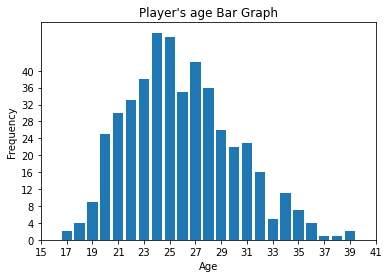

In [130]:
h = SA["Age"]
#print(h)
cnt = Counter(h)
#print(cnt)

## Sorting the items in the dictionary in accesseding order.
sort_cnt = sorted(cnt.items())
sort_cnt_dict = dict(sort_cnt)

#print(sort_cnt_dict)

keys = sort_cnt_dict.keys()
#print(keys)

values = sort_cnt_dict.values()
#print(values)

plt.bar(keys, values, width = 0.8)
plt.title("Player's age Bar Graph")
plt.xlabel("Age")
plt.ylabel("Frequency")
#ax.xaxis.grid(True, which='minor')

plt.xticks([15,17,19,21,23,25,27,29,31,33,35,37,39,41])
plt.yticks([0,4,8,12,16,20,24,28,32,36,40])



plt.show()


